In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('final_dataset.csv')
df.head()

,label,text
0,anger,grab minute post feel greedy wrong
1,anger,feel grouchy
2,anger,think easiest time year feel dissatisfy
3,anger,feel irritate reject without anyone anything s...
4,anger,already feel like fuck though usually eat morning


In [3]:
tfidf = TfidfVectorizer( max_features=None, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['text'])
y= df['label']
print(X_tfidf.shape)

(10414, 69708)


In [4]:
final_test= pd.read_csv('final_test.csv')
X_test = tfidf.transform(final_test['text'])
y_test = final_test['label']

In [5]:
alphas = [0.1, 0.25, 0.5, 0.75, 1.0]
for a in alphas:
    model = MultinomialNB(alpha=a)
    model.fit(X_tfidf, y)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"alpha={a} → accuracy={acc:.4f}")


alpha=0.1 → accuracy=0.8299
alpha=0.25 → accuracy=0.8418
alpha=0.5 → accuracy=0.8376
alpha=0.75 → accuracy=0.8382
alpha=1.0 → accuracy=0.8361


In [6]:
nb_model = MultinomialNB(alpha=0.25)
nb_model.fit(X_tfidf, y)
print("Train Done")

Train Done


In [7]:
y_pred = nb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8417786970010341

Classification Report:
               precision    recall  f1-score   support

       anger       0.79      0.83      0.81       275
        fear       0.89      0.81      0.85       224
         joy       0.81      0.95      0.88       695
        love       0.82      0.37      0.51       159
     sadness       0.90      0.86      0.88       581

    accuracy                           0.84      1934
   macro avg       0.84      0.76      0.78      1934
weighted avg       0.84      0.84      0.83      1934



Confusion Matrix:

[[229   9  19   0  18]
 [ 14 182  13   0  15]
 [ 12   4 660  13   6]
 [ 10   1  71  59  18]
 [ 24   9  50   0 498]]


<Figure size 600x500 with 0 Axes>

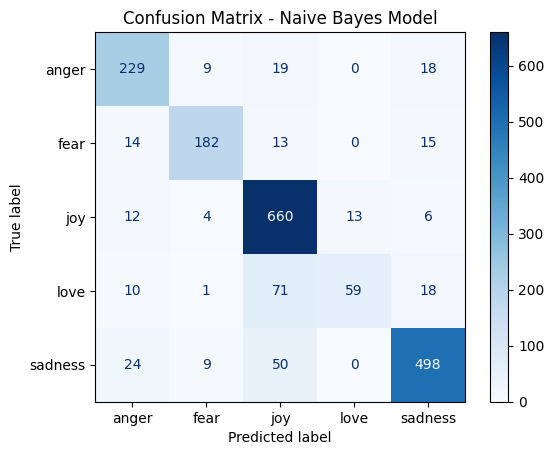

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=nb_model.classes_)
print("Confusion Matrix:\n")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
plt.figure(figsize=(6, 5))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Naive Bayes Model")
plt.show()